Nombre de récompense + transferts

Récupération des données de transfert

In [518]:
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from webdriver_manager.firefox import GeckoDriverManager
from bs4 import BeautifulSoup
import pandas as pd

urltransfert = "https://www.transfermarkt.fr/gerard-pique/transfers/spieler/18944"
urltrophée = "https://www.transfermarkt.fr/gerard-pique/erfolge/spieler/18944"

# Options Firefox headless
options = Options()
options.headless = True

# Lance Firefox via GeckoDriver
driver = webdriver.Firefox(service=Service(GeckoDriverManager().install()), options=options)

# Ouvre la page
url = urltransfert
driver.get(url)
time.sleep(5)

# Récupérer le HTML après chargement JS
html = driver.page_source
driver.quit()

# Parser avec BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Trouver la table
table = soup.find("tm-player-transfer-history")
table


<tm-player-transfer-history player-id="18944" translations="{&quot;headline&quot;:&quot;Historique des transferts &quot;,&quot;transferHistory&quot;:&quot;Historique de transferts&quot;,&quot;upcomingTransfers&quot;:&quot;Transferts \u00e0 venir&quot;,&quot;feesum&quot;:&quot;Montants totaux de transferts&quot;,&quot;season&quot;:&quot;Saison&quot;,&quot;date&quot;:&quot;Date &quot;,&quot;clubFrom&quot;:&quot;Venant de&quot;,&quot;clubTo&quot;:&quot;Allant \u00e0&quot;,&quot;marketValue&quot;:&quot;VM&quot;,&quot;transferFee&quot;:&quot;Montant de transfert&quot;,&quot;transferMapLinkText&quot;:&quot;Explorez l'historique des transferts sur une carte&quot;,&quot;loan&quot;:&quot;Pr\u00eat&quot;}">
<div class="box"><!-- --><!-- --><h2 class="content-box-headline svelte-2rqsu3">Historique des transferts </h2><!-- --> <div class="grid tm-player-transfer-history-grid tm-player-transfer-history-grid tm-player-transfer-history-grid--heading table-headline svelte-z9xrf7"><div class="grid__hea

Mise en forme des données

In [519]:
transfers = []

rows = table.find_all("div", class_=["tm-player-transfer-history-grid"])

for row in rows:
    cols = row.find_all("div", class_=["grid__cell"])
    for col in cols:
        saison = row.find("div", class_="tm-player-transfer-history-grid__season").text.strip()
        date = row.find("div", class_="tm-player-transfer-history-grid__date").text.strip()
        ancien = row.find("div", class_="tm-player-transfer-history-grid__old-club").text.strip()
        nouveau = row.find("div", class_="tm-player-transfer-history-grid__new-club").text.strip()
        vm = row.find("div", class_="tm-player-transfer-history-grid__market-value").text.strip()
        fee = row.find("div", class_="tm-player-transfer-history-grid__fee").text.strip()

    transfers.append({
                "Saison": saison,
                "Date": date,
                "De": ancien,
                "À": nouveau,
                "Montant": fee,
                "Valeur marchande" : vm
            })
    
dfTrans = pd.DataFrame(transfers).drop_duplicates()
dfTrans

,Saison,Date,De,À,Montant,Valeur marchande
0,01/02,01/07/2001,Barça FootbBase,Barça U16,-,-
1,22/23,01/01/2023,Barcelone,Fin de carrière,-,"3,00 mio €"
2,08/09,01/07/2008,Manchester Utd.,Barcelone,"5,00 mio €","5,50 mio €"
3,06/07,30/06/2007,Real Zaragoza,Manchester Utd.,Fin du prêt,"4,00 mio €"
4,06/07,04/08/2006,Manchester Utd.,Real Zaragoza,Prêt,"1,75 mio €"
5,04/05,01/07/2004,Barça U19,Manchester Utd.,"5,25 mio €",-
6,03/04,01/07/2003,Barça U16,Barça U19,-,-


Récuperation des données de récompenses

In [520]:
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from webdriver_manager.firefox import GeckoDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

# Options Firefox headless
options = Options()
options.headless = True

# Lance Firefox via GeckoDriver
driver = webdriver.Firefox(service=Service(GeckoDriverManager().install()), options=options)

# Ouvre la page
url = urltrophée
driver.get(url)
time.sleep(5)

# Récupérer le HTML après chargement JS
html = driver.page_source
driver.quit()

# Parser avec BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Trouver la table
table = soup.find("div", class_=["large-8", "columns"])
table


<div class="large-8 columns">
<div class="row">
<div class="large-6 columns">
<div class="box">
<h2 class="content-box-headline">
                            1x Champion du monde                        </h2>
<div>
<div class="erfolg_bild_box">
<img alt="Champion du monde" class="" src="https://tmssl.akamaized.net//images/erfolge/medium/101.png?lm=1520606996" title="Champion du monde"/> </div>
<div class="erfolg_info_box">
<table class="auflistung">
<tbody><tr>
<td class="erfolg_table_saison">2010</td>
<td class="erfolg_table_wappen">
<a href="/spanien/startseite/verein/3375/saison_id/2009" title="Espagne"><img alt="Espagne" class="flaggenrahmen" src="https://tmssl.akamaized.net//images/flagge/tiny/157.png?lm=1520611569" title="Espagne"/></a> </td>
<td>
<a href="/spanien/startseite/verein/3375/saison_id/2009" title="Espagne">Espagne</a> </td>
</tr>
</tbody></table>
</div>
</div>
<div class="clearer"></div>
</div>
</div>
<div class="large-6 columns">
<div class="box">
<h2 class="content-

Mise en forme des données

On prend en compte l'année civile durant laquelle est decérné le prix : le plus souvent en deuxième partie de saison

In [521]:
recompense = []

rows = table.find_all("div", class_=["large-6", "columns"])

for row in rows:
    cols = row.find_all("div", class_=["box"])
    for col in cols:
        titre = row.find("h2").text.strip()[3:]
        laureats = row.find_all("tr")
        for laureat in laureats:
            annee = laureat.find("td", class_=["erfolg_table_saison"]).text.strip()

            if "/" in annee:
                annee = int("20" + annee.split("/")[1])
            

            recompense.append({
                "Saison/Annee": annee,
                "Titre": titre
            })
    
dfRec = pd.DataFrame(recompense)
dfRec


,Saison/Annee,Titre
0,2010,Champion du monde
1,2012,Champion d'Europe
2,2015,Vainqueur Ligue des Champions
3,2011,Vainqueur Ligue des Champions
4,2009,Vainqueur Ligue des Champions
5,2008,Vainqueur Ligue des Champions
6,2008,Englischer Meister
7,2023,Spanischer Meister
8,2019,Spanischer Meister
9,2018,Spanischer Meister


Un peu de visualisation

In [522]:
dfTrans["Date"] = pd.to_datetime(dfTrans["Date"], dayfirst=True)
print(dfTrans.head())
dfTrans.info()




  Saison       Date               De                À      Montant  \
0  01/02 2001-07-01  Barça FootbBase        Barça U16            -   
1  22/23 2023-01-01        Barcelone  Fin de carrière            -   
2  08/09 2008-07-01  Manchester Utd.        Barcelone   5,00 mio €   
3  06/07 2007-06-30    Real Zaragoza  Manchester Utd.  Fin du prêt   
4  06/07 2006-08-04  Manchester Utd.    Real Zaragoza         Prêt   

  Valeur marchande  
0                -  
1       3,00 mio €  
2       5,50 mio €  
3       4,00 mio €  
4       1,75 mio €  
<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Saison            7 non-null      object        
 1   Date              7 non-null      datetime64[ns]
 2   De                7 non-null      object        
 3   À                 7 non-null      object        
 4   Montant           7 non-null 

In [523]:
dfRec["Saison/Annee"] = pd.to_datetime(dfRec["Saison/Annee"])
print(dfRec.head())
dfRec.info()


  Saison/Annee                          Titre
0   2010-01-01              Champion du monde
1   2012-01-01              Champion d'Europe
2   2015-01-01  Vainqueur Ligue des Champions
3   2011-01-01  Vainqueur Ligue des Champions
4   2009-01-01  Vainqueur Ligue des Champions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Saison/Annee  38 non-null     datetime64[ns]
 1   Titre         38 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 736.0+ bytes


In [524]:
import pandas as pd
import numpy as np

def montant_to_float(x):
    if pd.isna(x) or x == "-" or "Fin du prêt" in x or "Prêt" in x:
        return np.nan
    x = x.replace("mio €", "").replace(",", ".").strip()
    try:
        return float(x)
    except:
        return np.nan
        
def to_float(s):
    try:
        # Exemple simple de conversion en float après nettoyage
        if not s or s == '-':
            return 0.0
        s = s.lower().replace("mio €", "").replace(",", ".").strip()
        return float(s)
    except:
        return 0.0

dfTrans["Montant_num"] = dfTrans["Montant"].apply(to_float)
dfTrans["Valeur_marchande_num"] = dfTrans["Valeur marchande"].apply(montant_to_float)
dfTrans["Année"] = dfTrans["Date"].dt.year
dfTrans = dfTrans.sort_values(by="Date", ascending=False)
dfTrans


,Saison,Date,De,À,Montant,Valeur marchande,Montant_num,Valeur_marchande_num,Année
1,22/23,2023-01-01,Barcelone,Fin de carrière,-,"3,00 mio €",0.00,3.00,2023
2,08/09,2008-07-01,Manchester Utd.,Barcelone,"5,00 mio €","5,50 mio €",5.00,5.50,2008
3,06/07,2007-06-30,Real Zaragoza,Manchester Utd.,Fin du prêt,"4,00 mio €",0.00,4.00,2007
4,06/07,2006-08-04,Manchester Utd.,Real Zaragoza,Prêt,"1,75 mio €",0.00,1.75,2006
5,04/05,2004-07-01,Barça U19,Manchester Utd.,"5,25 mio €",-,5.25,NaN,2004
6,03/04,2003-07-01,Barça U16,Barça U19,-,-,0.00,NaN,2003
0,01/02,2001-07-01,Barça FootbBase,Barça U16,-,-,0.00,NaN,2001


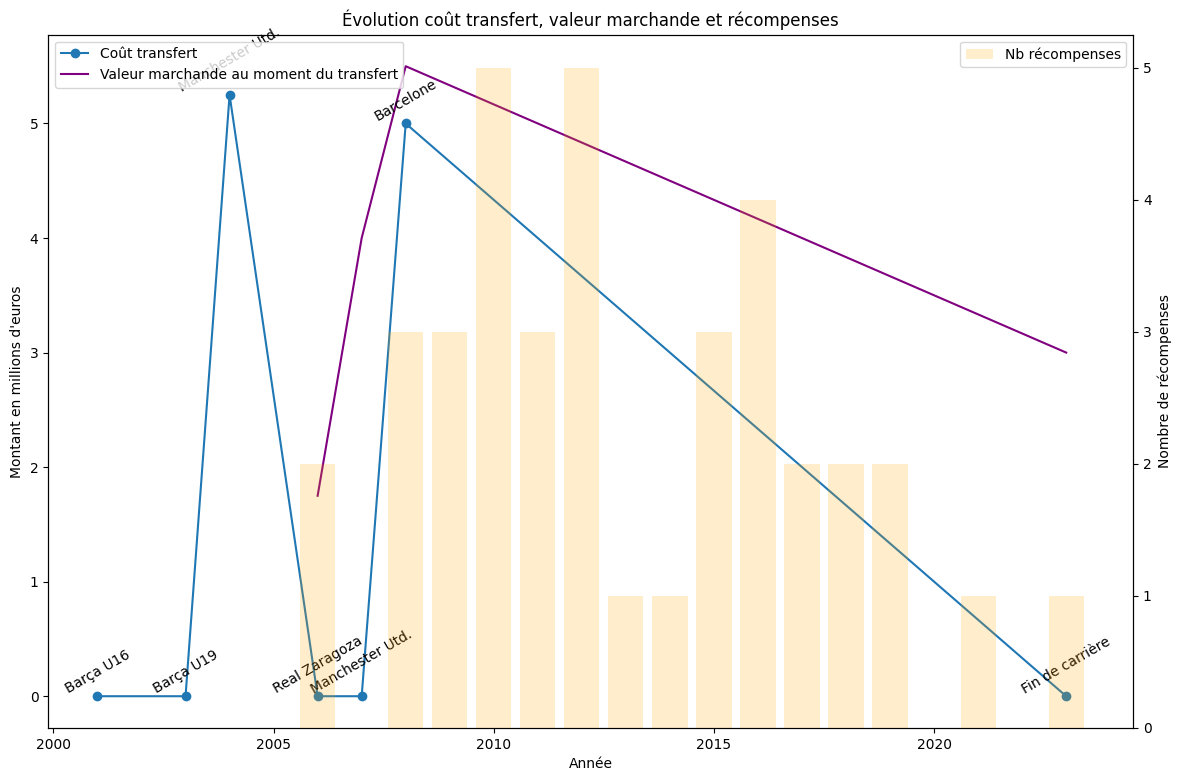

In [525]:
import matplotlib.pyplot as plt

# 1. Extraire l'année de la colonne Saison/Annee dans dfRec
dfRec['Année'] = dfRec['Saison/Annee'].dt.year

# 2. Compter le nombre de récompenses par année
recompenses_par_annee = dfRec.groupby('Année').size()

fig, ax = plt.subplots(figsize=(14, 9))

# Plot coût transfert
ax.plot(dfTrans["Année"], dfTrans["Montant_num"], label="Coût transfert", marker='o')
for x, y, label in zip(dfTrans["Année"], dfTrans["Montant_num"], dfTrans["À"]):
    ax.text(x, y, label, fontsize=10, ha='center', va='bottom', rotation=30)

# Plot valeur marchande
ax.plot(dfTrans["Année"], dfTrans["Valeur_marchande_num"], color='purple', label="Valeur marchande au moment du transfert")

ax.set_xlabel("Année")
ax.set_ylabel("Montant en millions d'euros")
ax.set_title("Évolution coût transfert, valeur marchande et récompenses")
ax.legend(loc='upper left')

# 3. Créer un axe y secondaire pour les barres
ax2 = ax.twinx()

# 4. Bar chart des récompenses par année
ax2.bar(recompenses_par_annee.index, recompenses_par_annee.values, alpha=0.2, color='orange', label='Nb récompenses')

ax2.set_ylabel("Nombre de récompenses")
ax2.legend(loc='upper right')





plt.show()

In [526]:
# Extraire année-club des transferts
clubs_par_annee = dfTrans.groupby('Année')['De'].last()  # dernier club dans l'année, par ex.

# Fusionner avec dfRec
dfRec = dfRec.merge(clubs_par_annee.rename('Club'), left_on='Année', right_index=True, how='left')

# Puis refaire le groupby par année + club et visualiser comme au cas 1
# Assurons-nous d'avoir une colonne "Club" dans dfRec

# Comptons les récompenses par année et club
recompenses_par_annee_club = dfRec.groupby(['Année', ' De']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(14, 7))

# Tracé des coûts et valeurs marchandes
ax.plot(dfTrans["Année"], dfTrans["Montant_num"], label="Coût transfert")
ax.plot(dfTrans["Année"], dfTrans["Valeur_marchande_num"], color='purple', label="Valeur marchande au moment du transfert")

ax.set_xlabel("Année")
ax.set_ylabel("Montant en millions d'euros")
ax.set_title("Évolution coût transfert, valeur marchande et récompenses par club")
ax.legend(loc='upper left')

# Axe y secondaire pour le bar chart
ax2 = ax.twinx()

# Barres empilées par club
recompenses_par_annee_club.plot(kind='bar', stacked=True, alpha=0.6, ax=ax2, legend=True)

ax2.set_ylabel("Nombre de récompenses")
ax2.legend(title="Club", loc='upper right')

plt.show()


KeyError: ' De'